In [10]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data from CSV file
df = pd.read_csv("bankruptcy.csv")
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
# Split the data into training and testing sets
X = df.drop("Bankrupt?", axis=1)
y = df["Bankrupt?"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Building a Neural Network Model

In [4]:
# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [5]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [6]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
171/171 [==============================] - 1s 2ms/step - loss: 25290312.0000 - accuracy: 0.9468 - val_loss: 13929619.0000 - val_accuracy: 0.9553
Epoch 2/50
171/171 [==============================] - 0s 1ms/step - loss: 9211981.0000 - accuracy: 0.9474 - val_loss: 9535264.0000 - val_accuracy: 0.9450
Epoch 3/50
171/171 [==============================] - 0s 1ms/step - loss: 6800605.0000 - accuracy: 0.9459 - val_loss: 7963917.0000 - val_accuracy: 0.9399
Epoch 4/50
171/171 [==============================] - 0s 1ms/step - loss: 5993839.0000 - accuracy: 0.9465 - val_loss: 8087857.5000 - val_accuracy: 0.9010
Epoch 5/50
171/171 [==============================] - 0s 1ms/step - loss: 5033522.0000 - accuracy: 0.9472 - val_loss: 15355460.0000 - val_accuracy: 0.9619
Epoch 6/50
171/171 [==============================] - 0s 1ms/step - loss: 5774600.5000 - accuracy: 0.9490 - val_loss: 8604606.0000 - val_accuracy: 0.9223
Epoch 7/50
171/171 [==============================] - 0s 1ms/step - loss:

### Seeing the accuracy of our model(s)

In [9]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

# Print the accuracy
print("Accuracy:", accuracy)

43/43 [==============================] - 0s 1ms/step - loss: 10231676.0000 - accuracy: 0.9164
Accuracy: 0.9164223074913025


### Trying to do some visualisation of the data here


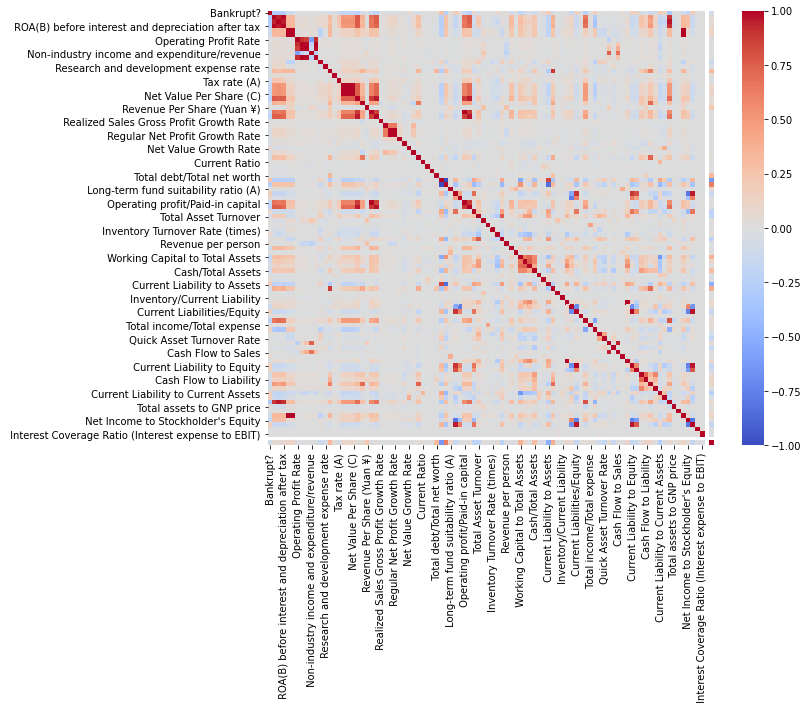

In [11]:
# Create a correlation matrix
corr_matrix = df.corr()

# Generate a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm')

# Show the plot
plt.show()